In [2]:
%matplotlib inline
import pandas as pd
pd.options.display.float_format = '${:,.0f}'.format
import numpy as np
import matplotlib.pyplot as plt

In [3]:
imsdata = pd.read_csv('ims2.csv')

In [4]:
imsdata.head()

,Molecule,Form,Type,Product,Strength,2009_Sales,2010_Sales,2011_Sales,2012_Sales,2013_Sales,2014_Sales,2015_Sales
0,1-PROPANOL,D DERMATOLOGICALS,OTHER,ALCOHOL SWABS,NaN,"$2,311,722","$2,133,230","$837,895","$1,016,693","$994,266","$961,960","$234,939"
1,3-METHYLSALICYLIC ACID!CAPSAICIN!MENTHOL,D DERMATOLOGICALS,OTHER,ZIKS,NaN,"$41,709","$59,281","$60,949","$40,710","$38,618","$35,518","$6,713"
2,4-HYDROXYBUTYRIC ACID,O ORALS,BRAND,XYREM,500MG/ML,NaN,NaN,NaN,NaN,NaN,$562,NaN
3,7-KETO HYDROANDROSTERONE,Y ALL OTHERS,GENERIC,7-KETO DHEA,100%,"$25,104","$42,357","$37,992","$62,192","$40,504","$45,794","$11,945"
4,8-QUINOLINOL,D DERMATOLOGICALS,OTHER,BAG BALM,0.30%,"$214,230","$386,476","$336,072","$304,694","$362,309","$19,916",$12


In [5]:
imsdata['2009_Sales'] = imsdata['2009_Sales'].str.replace(',', '').str.replace('$', '').str.strip().astype(float)
imsdata['2010_Sales'] = imsdata['2010_Sales'].str.replace(',', '').str.replace('$', '').str.strip().astype(float)
imsdata['2011_Sales'] = imsdata['2011_Sales'].str.replace(',', '').str.replace('$', '').str.strip().astype(float)
imsdata['2012_Sales'] = imsdata['2012_Sales'].str.replace(',', '').str.replace('$', '').str.strip().astype(float)
imsdata['2013_Sales'] = imsdata['2013_Sales'].str.replace(',', '').str.replace('$', '').str.strip().astype(float)
imsdata['2014_Sales'] = imsdata['2014_Sales'].str.replace(',', '').str.replace('$', '').str.strip().astype(float)
imsdata['2015_Sales'] = imsdata['2015_Sales'].str.replace(',', '').str.replace('$', '').str.strip().astype(float)

In [6]:
imsdata.head()

,Molecule,Form,Type,Product,Strength,2009_Sales,2010_Sales,2011_Sales,2012_Sales,2013_Sales,2014_Sales,2015_Sales
0,1-PROPANOL,D DERMATOLOGICALS,OTHER,ALCOHOL SWABS,NaN,"$2,311,722","$2,133,230","$837,895","$1,016,693","$994,266","$961,960","$234,939"
1,3-METHYLSALICYLIC ACID!CAPSAICIN!MENTHOL,D DERMATOLOGICALS,OTHER,ZIKS,NaN,"$41,709","$59,281","$60,949","$40,710","$38,618","$35,518","$6,713"
2,4-HYDROXYBUTYRIC ACID,O ORALS,BRAND,XYREM,500MG/ML,$nan,$nan,$nan,$nan,$nan,$562,$nan
3,7-KETO HYDROANDROSTERONE,Y ALL OTHERS,GENERIC,7-KETO DHEA,100%,"$25,104","$42,357","$37,992","$62,192","$40,504","$45,794","$11,945"
4,8-QUINOLINOL,D DERMATOLOGICALS,OTHER,BAG BALM,0.30%,"$214,230","$386,476","$336,072","$304,694","$362,309","$19,916",$12


In [7]:
molecule = 'ALENDRONATE'
strength = ['5MG', '10MG', '35MG', '70MG']
drugtype = 'GENERIC'
form = 'O ORALS'

In [8]:
selected_df = imsdata[(imsdata.Strength.isin(strength)) & (imsdata.Form == form) & (imsdata.Molecule == molecule)]
selected_df.head()

,Molecule,Form,Type,Product,Strength,2009_Sales,2010_Sales,2011_Sales,2012_Sales,2013_Sales,2014_Sales,2015_Sales
1085,ALENDRONATE,O ORALS,BRANDED GENERIC,BINOSTO,70MG,$nan,$nan,$nan,"$281,425","$815,645","$1,472,026","$448,675"
1086,ALENDRONATE,O ORALS,BRAND,FOSAMAX,10MG,"$805,690","$612,191","$130,878",$326,$nan,$nan,$nan
1087,ALENDRONATE,O ORALS,BRAND,FOSAMAX,35MG,"$2,204,761","$2,583,472","$188,682","$4,926",$384,$nan,$nan
1089,ALENDRONATE,O ORALS,BRAND,FOSAMAX,5MG,"$78,309","$35,179",$nan,$nan,$213,$nan,$nan
1090,ALENDRONATE,O ORALS,BRAND,FOSAMAX,70MG,"$19,602,549","$28,168,723","$20,109,420","$7,407,686","$5,048,889","$4,426,447","$1,085,342"


In [9]:
selected_df['2015_Sales'] = selected_df['2015_Sales'] * 4

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
bybrand_df = selected_df.groupby('Type')
bybrand_df.sum()

,2009_Sales,2010_Sales,2011_Sales,2012_Sales,2013_Sales,2014_Sales,2015_Sales
Type,,,,,,,
BRAND,"$22,691,309","$31,399,565","$20,428,980","$7,412,938","$5,049,486","$4,426,447","$4,341,368"
BRANDED GENERIC,$nan,$nan,$nan,"$281,425","$815,645","$1,472,026","$1,794,700"
GENERIC,"$56,027,943","$90,029,146","$59,556,923","$45,711,446","$43,284,361","$35,340,126","$30,495,728"


In [11]:
byproduct_df = selected_df.groupby('Product')
byproduct_df.sum()

,2009_Sales,2010_Sales,2011_Sales,2012_Sales,2013_Sales,2014_Sales,2015_Sales
Product,,,,,,,
ALENDRONATE SOD,"$56,027,943","$90,029,146","$59,556,923","$45,711,446","$43,284,361","$35,340,126","$30,495,728"
BINOSTO,$nan,$nan,$nan,"$281,425","$815,645","$1,472,026","$1,794,700"
FOSAMAX,"$22,691,309","$31,399,565","$20,428,980","$7,412,938","$5,049,486","$4,426,447","$4,341,368"


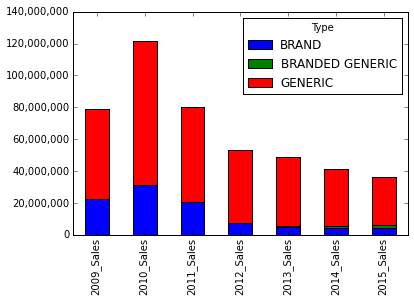

In [12]:
ax = bybrand_df.sum().transpose().plot(kind='bar', stacked=True)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

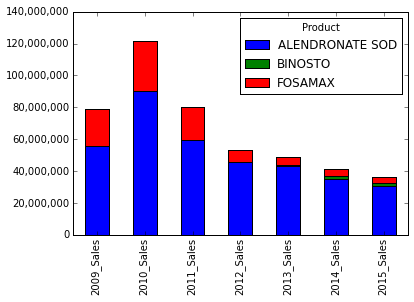

In [13]:
ax = byproduct_df.sum().transpose().plot(kind='bar', stacked=True)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))